In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('data/train.csv')

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df_train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
532,533,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,107500
198,199,75,RM,92.0,5520,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
765,766,20,RL,75.0,14587,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,264132
1272,1273,20,RL,NaN,13526,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2006,WD,Normal,137000


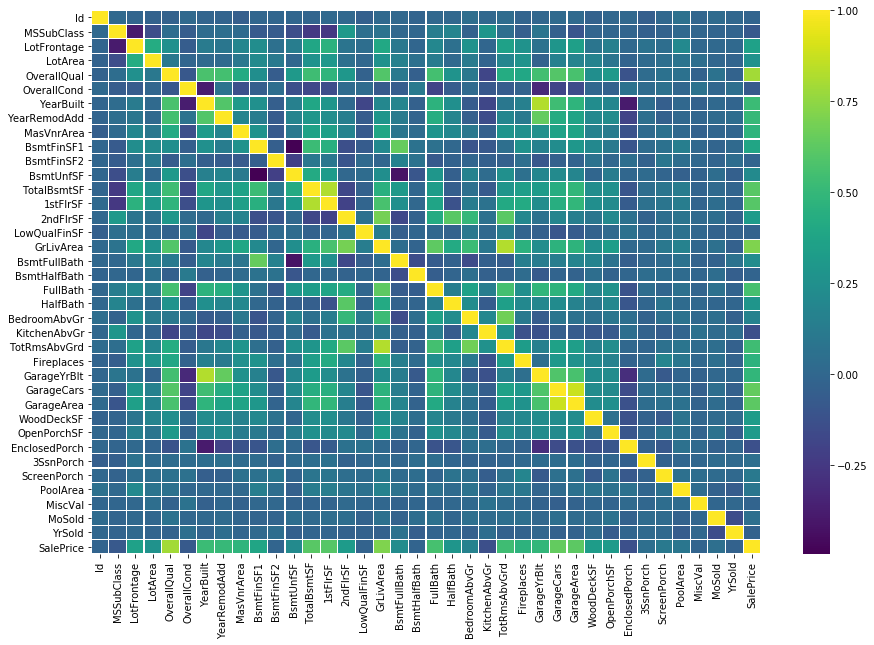

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), cmap='viridis', linewidths=.1)

In [3]:
correlation = df_train.corr()

In [6]:
sale_correlation = correlation['SalePrice']

In [19]:
corr_df = pd.DataFrame(sale_correlation[(sale_correlation > 0) | (sale_correlation < -0.5)])

In [25]:
corr_df.sort_values(ascending=True, by='SalePrice')

,SalePrice
3SsnPorch,0.044584
MoSold,0.046432
PoolArea,0.092404
ScreenPorch,0.111447
BedroomAbvGr,0.168213
BsmtUnfSF,0.214479
BsmtFullBath,0.227122
LotArea,0.263843
HalfBath,0.284108
OpenPorchSF,0.315856


In [24]:
corr_df

,SalePrice
LotFrontage,0.351799
LotArea,0.263843
OverallQual,0.790982
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.477493
BsmtFinSF1,0.386420
BsmtUnfSF,0.214479
TotalBsmtSF,0.613581
1stFlrSF,0.605852


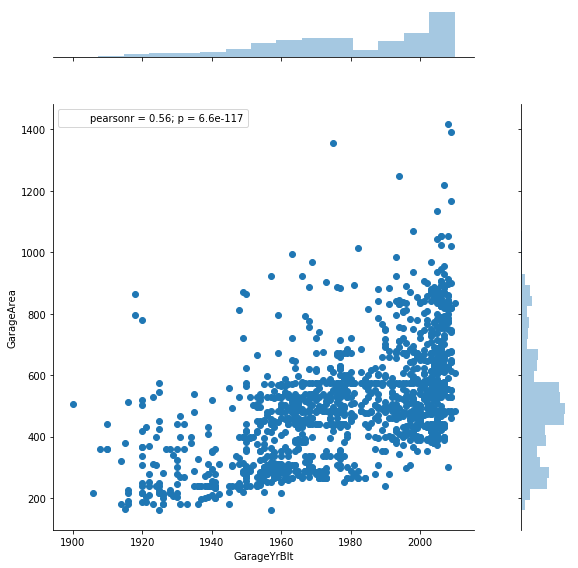

In [33]:
sns.jointplot(x=df_train['GarageYrBlt'], y=df_train['GarageArea'], size=8, space=1)